- http://machinelearningmastery.com/image-augmentation-deep-learning-keras/
- https://keras.io/preprocessing/image/
- **https://github.com/fchollet/keras/blob/master/keras/preprocessing/image.py   



- https://www.kaggle.com/hexietufts/ultrasound-nerve-segmentation/easy-to-use-keras-imagedatagenerator

- https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html


## *
- http://www.scipy-lectures.org/packages/scikit-image/
- http://www.scipy-lectures.org/advanced/image_processing/
- https://in.pycon.org/2010/static/files/talks/33/PyCon2010ImageProcessingAnilCR.pdf
- http://pythonvision.org/basic-tutorial/
- https://github.com/EdwardTyantov/ultrasound-nerve-segmentation/blob/master/augmentation.py    
- http://pythonvision.org/basic-tutorial/   


- http://tensorlayer.readthedocs.io/en/latest/modules/prepro.html


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [2]:
# !pwd
path='/Users/hrm/Documents/Dropbox/DSrelated/DG_datachallenge'
# path = '/home/ubuntu/pynb/DG_datachallenge'


In [3]:
## Get fullpaths to img files
import glob, os, sys

btmp = glob.glob(os.path.join(path+'/building_set/buildings/','*.tif')) #os.listdir( path+'/building_set/buildings/' )
# buildingFileNames
nbtmp = glob.glob(os.path.join(path+'/building_set/no_buildings/','*.tif')) #os.listdir( path+'/building_set/no_buildings' )
# nobuildingFileNames

buildingFileNames = btmp
nobuildingFileNames = nbtmp


In [4]:
len(buildingFileNames),len(nobuildingFileNames)

(2000, 20000)

In [90]:
# test_img = path+'/building_set/train/buildings/100208.tif'
# img = path+'/building_set/train/buildings/454619.tif'

In [5]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

Using TensorFlow backend.


In [21]:
# load_img(buildingFileNames[0]) 

In [22]:
# load_img(nobuildingFileNames[0])

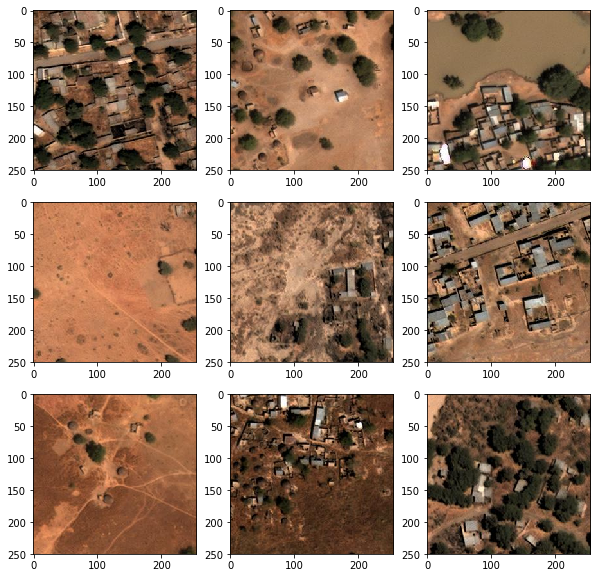

In [6]:
plt.figure(figsize=(10,10))
for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.imshow(load_img(buildingFileNames[i]))

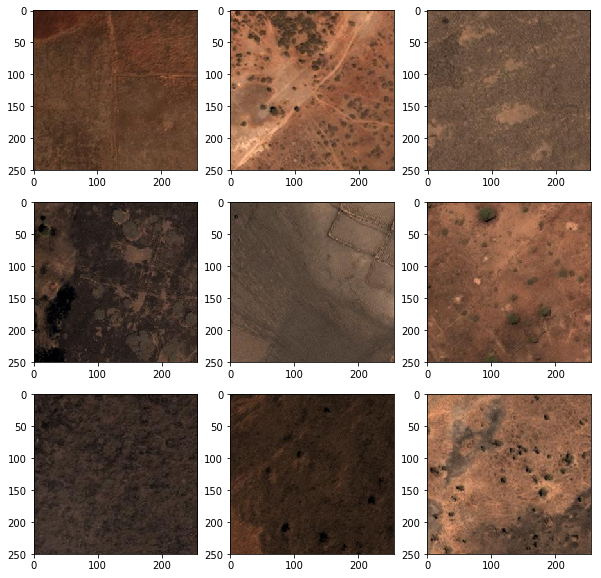

In [89]:
plt.figure(figsize=(10,10))
for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.imshow(load_img(nobuildingFileNames[i]))

In [ ]:
## simple test
# from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rescale=8,
        rotation_range=60,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range= 0.3, #0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='constant')

#img = load_img('data/train/cats/cat.0.jpg')  # this is a PIL image
img = load_img(buildingFileNames[0])  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir=path+'/building_set/preview', save_prefix='b_', save_format='tif'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

In [82]:
buildingFileNames[:9]

['/Users/hrm/Documents/Dropbox/DSrelated/DG_datachallenge/building_set/buildings/100208.tif',
 '/Users/hrm/Documents/Dropbox/DSrelated/DG_datachallenge/building_set/buildings/100415.tif',
 '/Users/hrm/Documents/Dropbox/DSrelated/DG_datachallenge/building_set/buildings/100663.tif',
 '/Users/hrm/Documents/Dropbox/DSrelated/DG_datachallenge/building_set/buildings/100866.tif',
 '/Users/hrm/Documents/Dropbox/DSrelated/DG_datachallenge/building_set/buildings/100883.tif',
 '/Users/hrm/Documents/Dropbox/DSrelated/DG_datachallenge/building_set/buildings/101098.tif',
 '/Users/hrm/Documents/Dropbox/DSrelated/DG_datachallenge/building_set/buildings/101103.tif',
 '/Users/hrm/Documents/Dropbox/DSrelated/DG_datachallenge/building_set/buildings/1014.tif',
 '/Users/hrm/Documents/Dropbox/DSrelated/DG_datachallenge/building_set/buildings/101588.tif']

In [81]:
buildingFileNames[2].split('/')[-1][:-4]

'100663.'

In [166]:
# img = load_img(buildingFileNames[2])  # this is a PIL image
# img = load_img(nobuildingFileNames[1])  # this is a PIL image

## Buildings on img edge: lost if over-rotated + zoom
# img = load_img(path+'/building_set/train/buildings/454619.tif') 
img = load_img(path+'/building_set/train/buildings/288278.tif')

x = img_to_array(img)
x.shape

(250, 255, 3)

In [179]:
# Standardize images across the dataset, mean=0, stdev=1
# XX K.set_image_dim_ordering('th')

# from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import backend as K

# # load data
# (X_train, y_train), (X_test, y_test) = mnist.load_data()
# # reshape to be [samples][pixels][width][height]
# X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
# X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
# # convert from int to float
# X_train = X_train.astype('float32')
# X_test = X_test.astype('float32')

xx = x.reshape(1, x.shape[0], x.shape[1], x.shape[2])

## define data preparation

# shift = 0.2
# featurewise_center=True, 
# featurewise_std_normalization=True,
# XX# zca_whitening=True,
# XX# width_shift_range=shift, height_shift_range=shift,
#rescale=10,

datagen = ImageDataGenerator(
#                             rotation_range=180,
                            rotation_range=2,
                            horizontal_flip=True,
                            vertical_flip=True,                            
#                             zoom_range = [0.8,0.8],                            
                            )

# fit parameters from data
# datagen.fit(X_train)
datagen.fit(xx,augment=True)

# # configure batch size and retrieve one batch of images
# for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
# 	# create a grid of 3x3 images
# 	for i in range(0, 9):
# 		pyplot.subplot(330 + 1 + i)
# 		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
# 	# show the plot
# 	pyplot.show()
# 	break

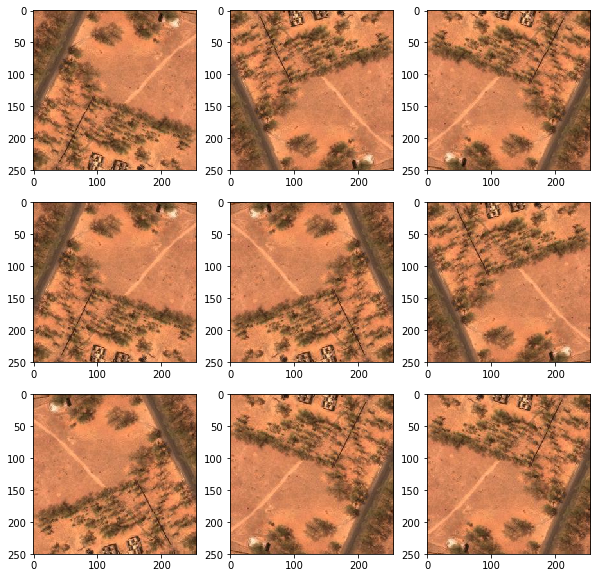

In [180]:
# for xxx in datagen.flow(xx, batch_size=1):
#     plt.imshow(array_to_img(xxx[0]))

plt.figure(figsize=(10,10))
i = 0
for batch in datagen.flow(xx, batch_size=1,
                          #save_to_dir=path+'/building_set/preview', 
                          #save_prefix='b_',
#                           save_to_dir=path+'/building_set/augmented', 
#                           save_prefix='b_'+buildingFileNames[2].split('/')[-1][:-4] +'_', 
#                           save_format='tif'
                         ):

    for n in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(array_to_img(batch[0]))
        
    i += 1
    if i >= 9: #20:
        break     

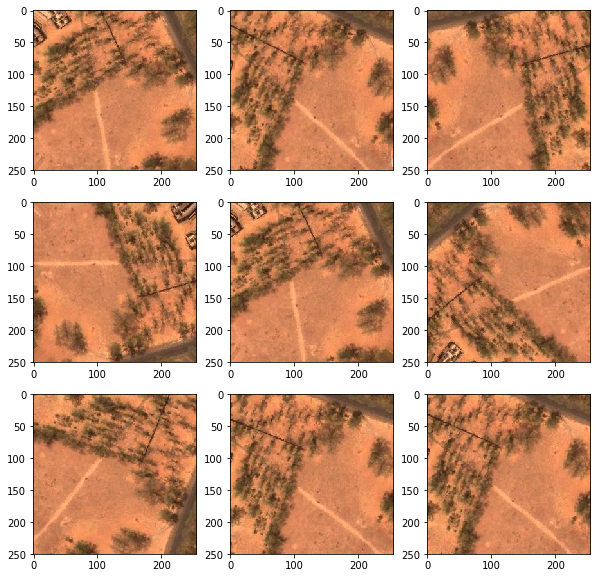

In [175]:
# for xxx in datagen.flow(xx, batch_size=1):
#     plt.imshow(array_to_img(xxx[0]))

plt.figure(figsize=(10,10))
i = 0
for batch in datagen.flow(xx, batch_size=1,
                          #save_to_dir=path+'/building_set/preview', 
                          #save_prefix='b_',
#                           save_to_dir=path+'/building_set/augmented', 
#                           save_prefix='b_'+buildingFileNames[2].split('/')[-1][:-4] +'_', 
#                           save_format='tif'
                         ):

    for n in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(array_to_img(batch[0]))
        
    i += 1
    if i >= 9: #20:
        break     

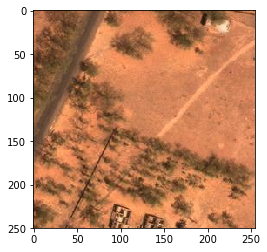

In [178]:
plt.imshow(array_to_img(x))

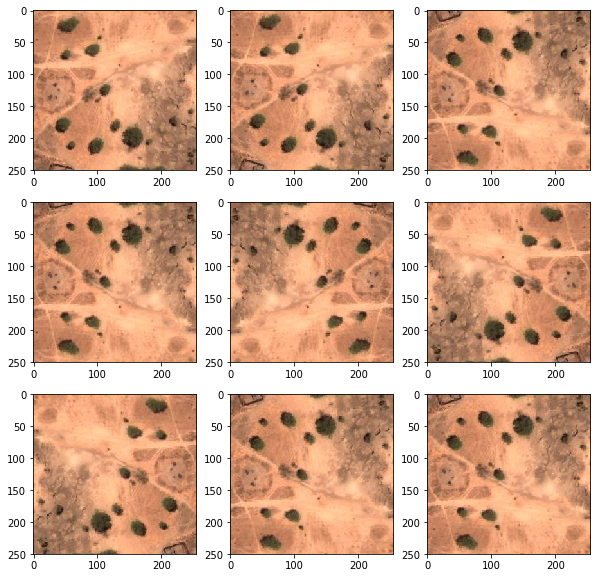

In [142]:
# for xxx in datagen.flow(xx, batch_size=1):
#     plt.imshow(array_to_img(xxx[0]))

plt.figure(figsize=(10,10))
i = 0
for batch in datagen.flow(xx, batch_size=1,
                          #save_to_dir=path+'/building_set/preview', 
                          #save_prefix='b_',
#                           save_to_dir=path+'/building_set/augmented', 
#                           save_prefix='b_'+buildingFileNames[2].split('/')[-1][:-4] +'_', 
#                           save_format='tif'
                         ):

    for n in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(array_to_img(batch[0]))
        
    i += 1
    if i >= 9: #20:
        break     

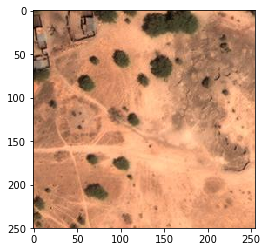

In [153]:
plt.imshow(array_to_img(x))

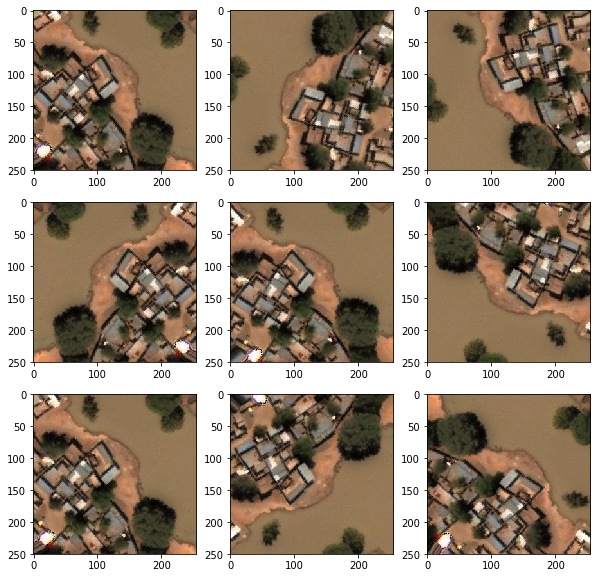

In [127]:
# for xxx in datagen.flow(xx, batch_size=1):
#     plt.imshow(array_to_img(xxx[0]))

plt.figure(figsize=(10,10))
i = 0
for batch in datagen.flow(xx, batch_size=1,
                          #save_to_dir=path+'/building_set/preview', 
                          #save_prefix='b_',
#                           save_to_dir=path+'/building_set/augmented', 
#                           save_prefix='b_'+buildingFileNames[2].split('/')[-1][:-4] +'_', 
#                           save_format='tif'
                         ):

    for n in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(array_to_img(batch[0]))
        
    i += 1
    if i >= 9: #20:
        break     

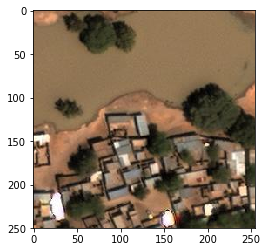

In [128]:
plt.imshow(array_to_img(x))